In [11]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
data_path = './data/processed/'
X_train = pd.read_csv(f'{data_path}X_train.csv')
X_test = pd.read_csv(f'{data_path}X_test.csv')
y_train = pd.read_csv(f'{data_path}Y_train.csv')
y_test = pd.read_csv(f'{data_path}Y_test.csv')

X_val = pd.read_csv(f'{data_path}X_val.csv')
y_val = pd.read_csv(f'{data_path}Y_val.csv')

Naive Bayes Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1473
           1       1.00      0.96      0.98        27

    accuracy                           1.00      1500
   macro avg       1.00      0.98      0.99      1500
weighted avg       1.00      1.00      1.00      1500



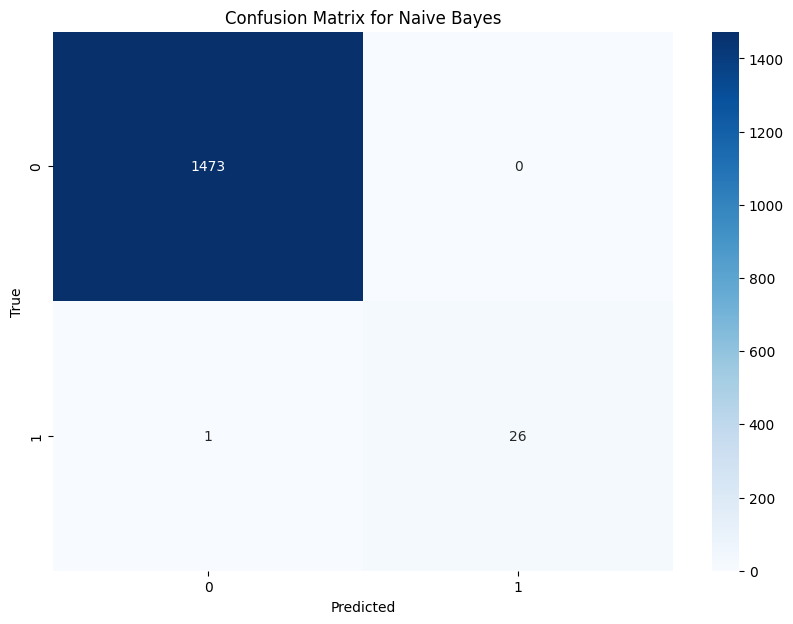

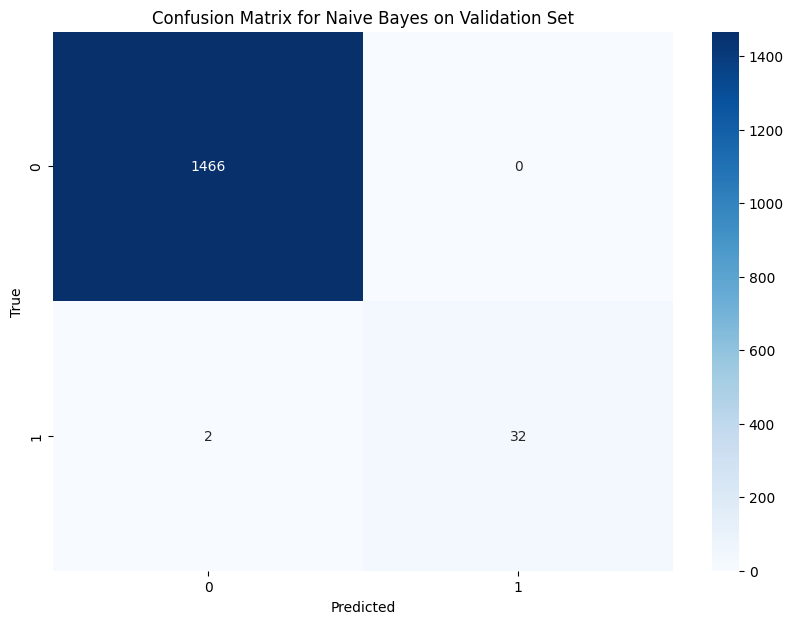

In [13]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

models = []
models.append(("Naive Bayes", GaussianNB()))
results = []

for name, model in models:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # confusion matrix validation
    y_val_pred = model.predict(X_val)
    cm_val = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name} on Validation Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
